In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import geopandas

# for extracting the population data
from urllib.request import urlopen
import json
from pandas.io.json import json_normalize

#to read in shape file and provides high #level interface with #matplotlib library for making maps
import geopandas as gpd

df = pd.read_csv('/home/fede/Documents/Learn/Datacamp/Python/Cleaning_Data/tb.csv')
df.head()

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5.0,12.0,10.0,NaN,3.0,16.0,1.0,3.0,0.0,0.0,4.0,NaN
2,AF,2000,52.0,228.0,183.0,149.0,129.0,94.0,80.0,NaN,93.0,414.0,565.0,339.0,205.0,99.0,36.0,NaN
3,AG,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
4,AL,2000,2.0,19.0,21.0,14.0,24.0,19.0,16.0,NaN,3.0,11.0,10.0,8.0,8.0,5.0,11.0,NaN


In [2]:
df.describe()

,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
count,201.0,162.000000,163.000000,164.000000,164.000000,165.000000,166.000000,164.000000,0.0,160.000000,160.000000,162.000000,160.000000,161.000000,162.000000,160.00000,0.0
mean,2000.0,76.462963,707.030675,1054.262195,952.853659,735.018182,499.036145,458.237805,NaN,92.175000,591.518750,680.901235,466.918750,309.459627,208.024691,211.39375,NaN
std,0.0,239.855913,2390.096784,3575.271431,3338.747797,2877.097622,2123.019199,1969.750315,NaN,285.954576,1825.058669,2172.952516,1474.724419,1056.555264,733.412334,713.19440,NaN
min,2000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
25%,2000.0,0.250000,8.000000,11.000000,14.750000,11.000000,9.250000,9.000000,NaN,1.000000,9.000000,9.000000,7.750000,5.000000,4.000000,5.00000,NaN
50%,2000.0,5.000000,87.000000,126.000000,119.000000,86.000000,53.000000,51.000000,NaN,7.000000,62.000000,74.500000,48.500000,31.000000,23.000000,28.50000,NaN
75%,2000.0,31.500000,508.000000,730.250000,599.500000,395.000000,235.750000,174.500000,NaN,44.000000,424.500000,477.500000,312.250000,213.000000,112.000000,111.00000,NaN
max,2000.0,1894.000000,20963.000000,31090.000000,30829.000000,25593.000000,21429.000000,21771.000000,NaN,2250.000000,14536.000000,18496.000000,12377.000000,9899.000000,7102.000000,6296.00000,NaN


Using describe, we see that our dataset has only one year: 2000, and each row represent a different country.

In [3]:
df.columns

Index(['country', 'year', 'm014', 'm1524', 'm2534', 'm3544', 'm4554', 'm5564',
       'm65', 'mu', 'f014', 'f1524', 'f2534', 'f3544', 'f4554', 'f5564', 'f65',
       'fu'],
      dtype='object')

In [4]:
df.shape

(201, 18)

Using shape, we see that we have 201 different countries represented in our dataset.

## Preparing Data for Analysis: Reshaping Data

This data is untidy and needs to be converted to be suitable for analysis. Acording to [Wickham 2014](https://vita.had.co.nz/papers/tidy-data.pdf), the standard way to organize values within a dataset is as follows:

* Rows represent individual observations.
* Columns represent separate variables.
* Each type of observational unit forms a table.

In this dataset, **columns** do not represent separate variables. 

And each **row** contains more than one observation. In the original dataset, each row represent a country-year combination.

To fix this problem, I will use the pandas function **[melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html)**.

In our dataset, the identifier columns are country and year. The rest of the columms hold values for each country-year combinations and will be melted down.

In [5]:
df = df.melt(id_vars=['country','year'],value_name='cases')
df.head()

,country,year,variable,cases
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0


Now, each row represents the number of cases for a different country.

In [6]:
df.shape

(3216, 4)

## Extract the sex and age group from the variable column

Each value of the 'variable' column contains the sex and the age group. This shape will not allow us to fix a model using sex and age as independent predictors.

The sex is represented by the first character of each value. I'll create a new column called 'sex' that will be the first character of the 'variable' column. For this, I will use the 'str' attibute, to treat the column as a string, and afterwards I will slice the string to extact the first character.

In [7]:
df['sex'] = df.variable.str[:1]
df.head()

,country,year,variable,cases,sex
0,AD,2000,m014,0.0,m
1,AE,2000,m014,2.0,m
2,AF,2000,m014,52.0,m
3,AG,2000,m014,0.0,m
4,AL,2000,m014,2.0,m


Regarding the age groups, I'll use the same procedure to extract the rest of the characters from the 'variable' column.

In [8]:
df['age_group'] = df.variable.str[1:]
df.head()

,country,year,variable,cases,sex,age_group
0,AD,2000,m014,0.0,m,014
1,AE,2000,m014,2.0,m,014
2,AF,2000,m014,52.0,m,014
3,AG,2000,m014,0.0,m,014
4,AL,2000,m014,2.0,m,014


Now, I just drop the 'variable' columns, since I've just extracted all the info from it into two different columns: 'sex' and 'age_group'

In [9]:
df.drop(columns=['variable'], inplace=True)

In [10]:
df.head(10)

,country,year,cases,sex,age_group
0,AD,2000,0.0,m,014
1,AE,2000,2.0,m,014
2,AF,2000,52.0,m,014
3,AG,2000,0.0,m,014
4,AL,2000,2.0,m,014
5,AM,2000,2.0,m,014
6,AN,2000,0.0,m,014
7,AO,2000,186.0,m,014
8,AR,2000,97.0,m,014
9,AS,2000,NaN,m,014


There are NaN values in cases, let's remove them using pandas dropna.

In [11]:
df.shape

(3216, 5)

In [12]:
df.dropna(inplace=True)
df.shape

(2259, 5)

In [13]:
df.head(10)

,country,year,cases,sex,age_group
0,AD,2000,0.0,m,014
1,AE,2000,2.0,m,014
2,AF,2000,52.0,m,014
3,AG,2000,0.0,m,014
4,AL,2000,2.0,m,014
5,AM,2000,2.0,m,014
6,AN,2000,0.0,m,014
7,AO,2000,186.0,m,014
8,AR,2000,97.0,m,014
10,AT,2000,1.0,m,014


In [14]:
type(df['cases'][0])

numpy.float64

The 'cases' column contains numerical data, but is represente with a string. I'll convert it to an integer using the Pandas to_numeric. 

In [15]:
#df['cases'] = pd.to_numeric(df['cases'],int)
#df.head(10)

In [16]:
df.country[:10]

0     AD
1     AE
2     AF
3     AG
4     AL
5     AM
6     AN
7     AO
8     AR
10    AT
Name: country, dtype: object

Country names are codified using ISO alpha-2 codes, while not strictly necessary, I'll convert the codes to country names.

First, I will extact an html table that contains the alpha-2 codes from Wikipedia, and convert this data to a dataframe that will have only 2 columns: Code and Country Name.

In [17]:
countries = pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-1')[1]

In [18]:
countries.head()

,English short name (using title case),Alpha-2 code,Alpha-3 code,Numeric code,Link to ISO 3166-2 subdivision codes,Independent
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Yes
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,No
2,Albania,AL,ALB,8,ISO 3166-2:AL,Yes
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Yes
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,No


In [19]:
countries = countries[countries.columns[:3]]

In [20]:
countries.head()

,English short name (using title case),Alpha-2 code,Alpha-3 code
0,Afghanistan,AF,AFG
1,Åland Islands,AX,ALA
2,Albania,AL,ALB
3,Algeria,DZ,DZA
4,American Samoa,AS,ASM


In [21]:
countries.columns = ['country_name','country-code2','country-code3']

Now, I will merge this dataset with the original dataset.

In [22]:
df = df.merge(countries,left_on='country',right_on='country-code2').drop(columns=['country'])

In [23]:
df.head()

,year,cases,sex,age_group,country_name,country-code2,country-code3
0,2000,0.0,m,014,Andorra,AD,AND
1,2000,0.0,m,1524,Andorra,AD,AND
2,2000,1.0,m,2534,Andorra,AD,AND
3,2000,0.0,m,3544,Andorra,AD,AND
4,2000,0.0,m,4554,Andorra,AD,AND


I will extract the population data from a json available on GitHub. I convert this data to a new dataframe, containing only two columns: country code and population.

In [24]:
population_url = 'https://gist.githubusercontent.com/gwillem/6ca8a81048e6f3721c3bafc803d44a72/raw/4fb66d18178c1a0fdf101fb6b03c4d21929472da/iso2_population.json'

In [25]:


response = urlopen(population_url)
population_json_data = response.read().decode('utf-8', 'replace')

population_json = json.loads(population_json_data)
population_df = pd.DataFrame.from_dict(population_json,orient='index')
population_df.columns = ['pop']

In [26]:
population_df.head()

,pop
AD,84000
AE,4975593
AF,29121286
AG,86754
AI,13254


In [27]:
type(population_df.iloc[0,0])

str

The population is represented as a string, I convert it to integer using to_numeric.

In [28]:
population_df['pop'] = pd.to_numeric(population_df['pop'])


In [29]:
population_df.head()

,pop
AD,84000
AE,4975593
AF,29121286
AG,86754
AI,13254


In [30]:
type(population_df.iloc[0,0])

numpy.int64

Now, I merge the population data with the original dataset, using the ISO 2-char code columns.

In [31]:
df.head()

,year,cases,sex,age_group,country_name,country-code2,country-code3
0,2000,0.0,m,014,Andorra,AD,AND
1,2000,0.0,m,1524,Andorra,AD,AND
2,2000,1.0,m,2534,Andorra,AD,AND
3,2000,0.0,m,3544,Andorra,AD,AND
4,2000,0.0,m,4554,Andorra,AD,AND


In [32]:
df = df.merge(population_df,left_on='country-code2',right_index=True)

In [33]:
df.head()

,year,cases,sex,age_group,country_name,country-code2,country-code3,pop
0,2000,0.0,m,014,Andorra,AD,AND,84000
1,2000,0.0,m,1524,Andorra,AD,AND,84000
2,2000,1.0,m,2534,Andorra,AD,AND,84000
3,2000,0.0,m,3544,Andorra,AD,AND,84000
4,2000,0.0,m,4554,Andorra,AD,AND,84000


# Exploartory Data Analysis

First, I will find the total number of cases per country. Because the dataset has several rows for each country, each row having data for each sex and age group combination, I will use the Pandas groupby operation to just sum all the cases for each country. 

In [34]:
# country
countries = df.groupby(['country_name','country-code3']).sum()
countries.reset_index(inplace=True)
countries.head()

,country_name,country-code3,year,cases,pop
0,Afghanistan,AFG,28000,2666.0,407698004
1,Albania,ALB,28000,171.0,41817328
2,Algeria,DZA,28000,8050.0,484206576
3,American Samoa,ASM,6000,3.0,173643
4,Andorra,AND,14000,1.0,588000


The number of cases per country is not meaningful if we don't take the population into account. Now, I will find the tuberculosis rate per country. 

To do this, I divide the number of cases by the population and multiply this for one million, in order to find the rate per million of people.

Afterwards, I sort the data by the rate, to find out the countries with the highest rates of tuberculosis.

In [35]:
countries['rate'] = countries['cases'] / countries['pop'] * (10**6)
countries = countries.sort_values(by='rate',ascending=False)
countries[:5]

,country_name,country-code3,year,cases,pop,rate
41,Djibouti,DJI,28000,1394.0,10367392,134.460045
22,Botswana,BWA,28000,3095.0,28410298,108.939371
85,Lesotho,LSO,28000,2729.0,26873728,101.548992
112,Northern Mariana Islands,MNP,28000,75.0,754362,99.421763
103,Nauru,NRU,6000,3.0,30195,99.354198


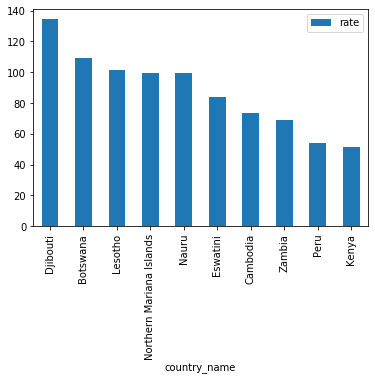

In [36]:
countries[:10].plot(kind='bar',x='country_name',y='rate')

In [37]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]  # exclude 2 no-man lands

In [38]:
merged = world.merge(countries,left_on='iso_a3',right_on='country-code3')
merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country_name,country-code3,year,cases,pop,rate
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",Afghanistan,AFG,28000,2666.0,407698004,6.539154
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,Angola,AGO,28000,8149.0,182954254,44.541189
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",Albania,ALB,28000,171.0,41817328,4.089214
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",United Arab Emirates,ARE,28000,70.0,69658302,1.004905
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,Argentina,ARG,28000,4519.0,578804814,7.807468


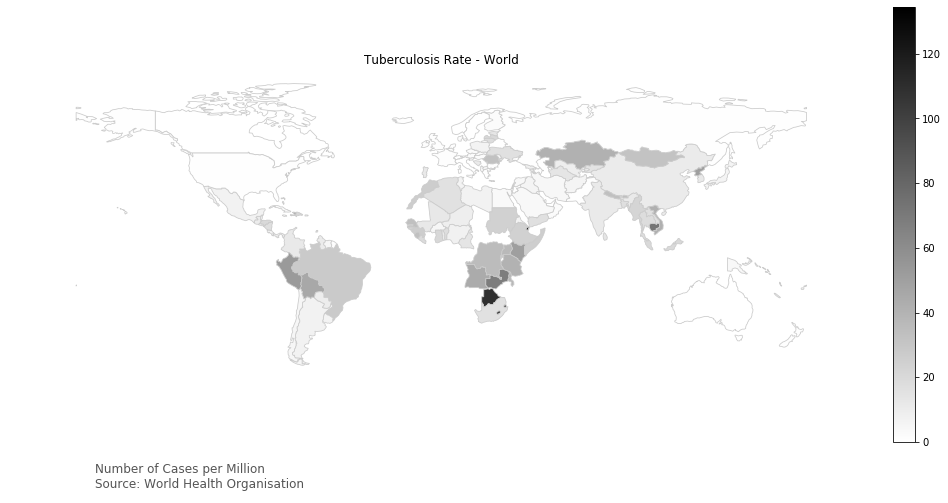

In [39]:
vmin, vmax = 0,max(merged.rate)
fig, ax = plt.subplots(1, figsize=(18, 8))
ax.set_title('Tuberculosis Rate - World')
ax.axis('off')
ax.annotate('Number of Cases per Million\nSource: World Health Organisation',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

sm = plt.cm.ScalarMappable(cmap='binary', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

merged.plot(column='rate', cmap='binary', linewidth=0.8, ax=ax, edgecolor='0.8')

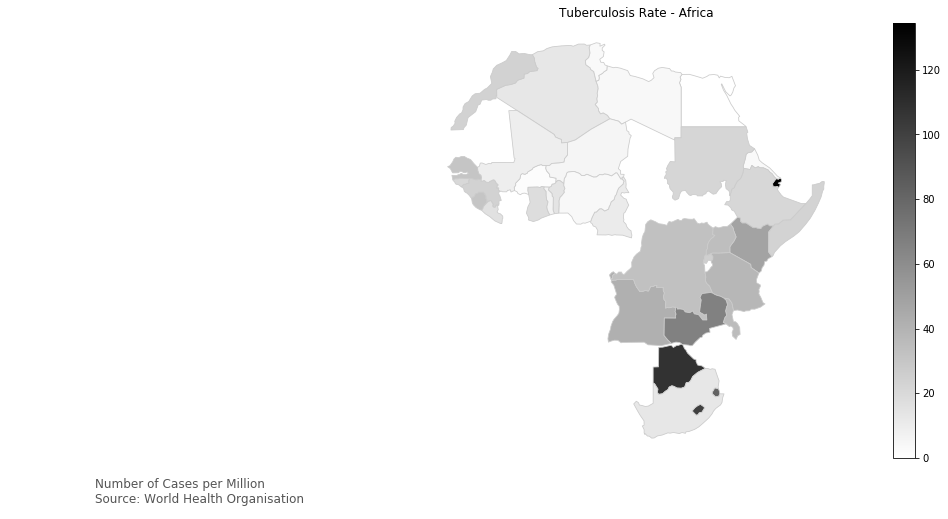

In [40]:
africa = merged[merged['continent'] == "Africa"] # only africa
vmin, vmax = 0,max(africa.rate)
fig, ax = plt.subplots(1, figsize=(18, 8))
ax.set_title('Tuberculosis Rate - Africa')
ax.axis('off')
ax.annotate('Number of Cases per Million\nSource: World Health Organisation',
            xy=(0.1, .08),
            xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=12,color='#555555')

sm = plt.cm.ScalarMappable(cmap='binary', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

africa.plot(column='rate', cmap='binary', linewidth=0.8, ax=ax, edgecolor='0.8')

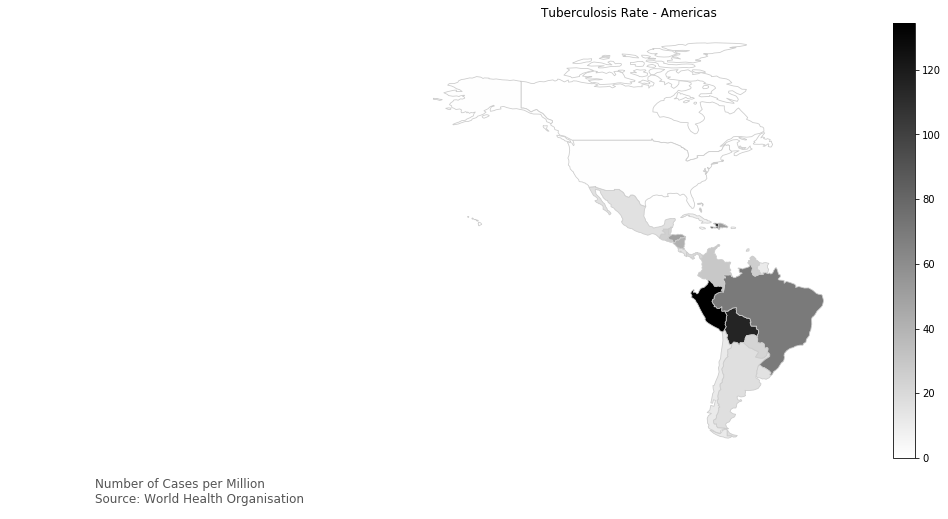

In [41]:
americas = merged[(merged['continent'] == "South America") | (merged['continent'] == "North America")]
vmin, vmax = 0,max(africa.rate)
fig, ax = plt.subplots(1, figsize=(18, 8))
ax.set_title('Tuberculosis Rate - Americas')
ax.axis('off')
ax.annotate('Number of Cases per Million\nSource: World Health Organisation',
            xy=(0.1, .08),
            xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=12,color='#555555')

sm = plt.cm.ScalarMappable(cmap='binary', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

americas.plot(column='rate', cmap='binary', linewidth=0.8, ax=ax, edgecolor='0.8')

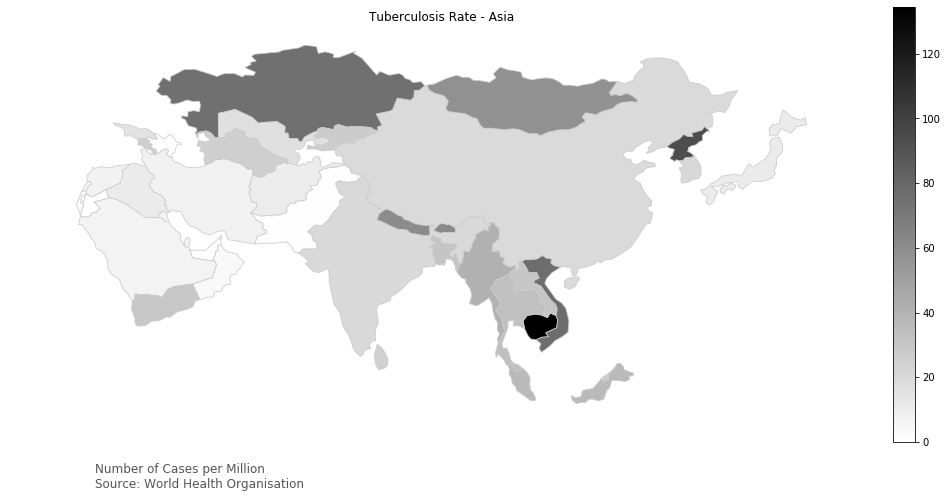

In [42]:
asia = merged[merged['continent'] == "Asia"] 
vmin, vmax = 0,max(africa.rate)
fig, ax = plt.subplots(1, figsize=(18, 8))
ax.set_title('Tuberculosis Rate - Asia')
ax.axis('off')
ax.annotate('Number of Cases per Million\nSource: World Health Organisation',
            xy=(0.1, .08),
            xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=12,color='#555555')

sm = plt.cm.ScalarMappable(cmap='binary', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

asia.plot(column='rate', cmap='binary', linewidth=0.8, ax=ax, edgecolor='0.8')